# 31. Next Permutation

A permutation of an array of integers is an arrangement of its members into a sequence or linear order.

For example, for arr = [1,2,3], the following are all the permutations of arr: [1,2,3], [1,3,2], [2,1,3], [2,3,1], [3,1,2], [3,2,1].
The next permutation of an array of integers is the next lexicographically greater permutation of its integer. More formally, if all the permutations of the array are sorted in one container according to their lexicographical order, then the next permutation of that array is the permutation that follows it in the sorted container. If such arrangement is not possible, the array must be rearranged as the lowest possible order (i.e., sorted in ascending order).

For example, the next permutation of arr = [1,2,3] is [1,3,2].
Similarly, the next permutation of arr = [2,3,1] is [3,1,2].
While the next permutation of arr = [3,2,1] is [1,2,3] because [3,2,1] does not have a lexicographical larger rearrangement.
Given an array of integers nums, find the next permutation of nums.

The replacement must be in place and use only constant extra memory.

https://leetcode.com/problems/next-permutation/description/

什么情况下没有 next greater permutation？数字只减不增（此时是最大，反之则最小）

从右往左，我们需要找到两个上升的数字 a[i-1] < a[i]，然后在 a[i:] 里找到最小的比 a[i-1] 更大的数字 a[j]。交换 a[i-1] a[j]。a[i:] 现在是由大到小的，reverse 使得它最小

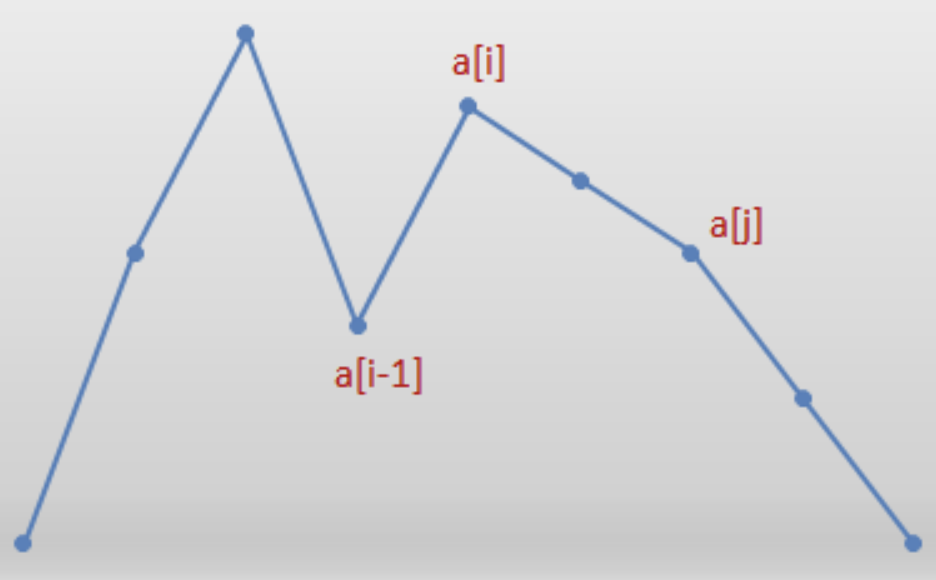



In [ ]:
from typing import List

class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        if not nums or len(nums) <= 1: return
        i = len(nums)-1
        while i > 0:
            # i-1 是需要换的错位
            if nums[i-1] < nums[i]: 
                break
            i -= 1 # 如果扫完 (i = 1) 的时候还没有找到错位，最后 i 会等于 0，不然 i 一定会大于 0
        # 找到错位才需要换，不然就不换了
        if i > 0:
            for j in range(len(nums)-1, i-1, -1):
                if nums[j] > nums[i-1]:
                    # j 是使得 i-1 刚好变大的另一位
                    nums[j], nums[i-1] = nums[i-1], nums[j]
                    break
        # 原本后面是只减不增的最大状态，现在改成只增不减的最小状态
        # 如果本身已经是最大状态，现在改成最小状态（因为i=0）
        for d in range((len(nums)-i)//2):
            nums[i + d], nums[len(nums) - 1 - d] = nums[len(nums) - 1 - d], nums[i + d]

# 556. Next Greater Element III

Given a positive integer n, find the smallest integer which has exactly the same digits existing in the integer n and is greater in value than n. If no such positive integer exists, return -1.

Note that the returned integer should fit in 32-bit integer, if there is a valid answer but it does not fit in 32-bit integer, return -1.

https://leetcode.com/problems/next-greater-element-iii/description/

In [ ]:
def nextGreaterElement(self, n: int) -> int:
    nums = [int(c) for c in str(n)]
    self.nextPermutation(nums)
    res = int(''.join([str(n) for n in nums]))
    return res if res > n and res < 2 ** 31 else -1